In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [5]:
!pip install wordcloud


In [6]:
data = pd.read_csv('/Users/rishavkumarsharma/Downloads/netflix1.csv')

print(data.head())
print(data.info())


  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [7]:
# Step 3: Data Cleaning
# Drop Duplicates
data.drop_duplicates(inplace=True)


In [8]:
# Handle missing critical values
data.dropna(subset=['director', 'country'], inplace=True)


In [9]:
# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])


In [11]:
# Create new date features
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month
data['day'] = data['date_added'].dt.day


/var/folders/v0/87_rm9fx26qgc2ffgmn71pqc0000gn/T/ipykernel_4032/3194244630.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, palette='Set2')


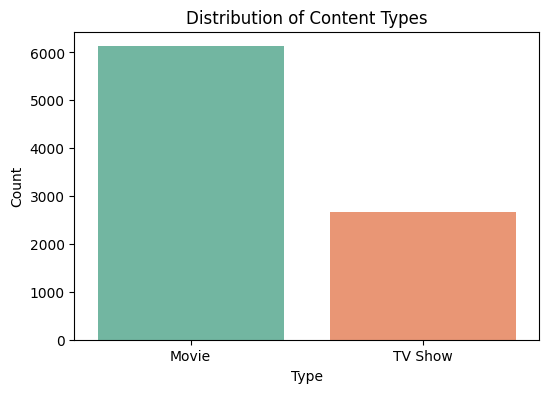

In [12]:
# Step 4: Exploratory Data Analysis (EDA)

# 1. Content Type Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=data, palette='Set2')
plt.title("Distribution of Content Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

/var/folders/v0/87_rm9fx26qgc2ffgmn71pqc0000gn/T/ipykernel_4032/2824198784.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=data, order=data['rating'].value_counts().index[:10], palette='pastel')


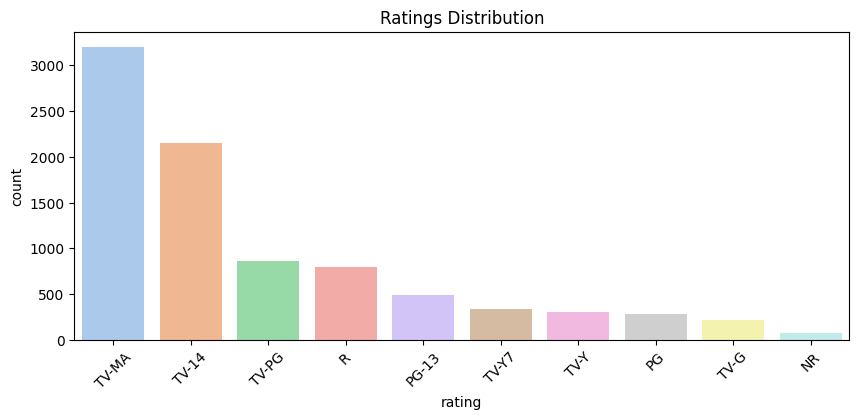

In [13]:
# 2. Ratings Distribution
plt.figure(figsize=(10, 4))
sns.countplot(x='rating', data=data, order=data['rating'].value_counts().index[:10], palette='pastel')
plt.title("Ratings Distribution")
plt.xticks(rotation=45)
plt.show()

/var/folders/v0/87_rm9fx26qgc2ffgmn71pqc0000gn/T/ipykernel_4032/2320680661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


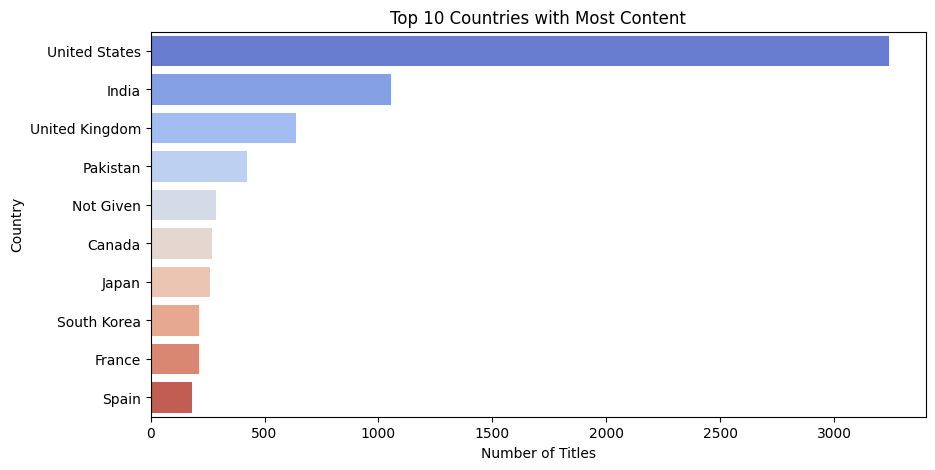

In [14]:
# 3. Top 10 Countries with Most Content
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries with Most Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

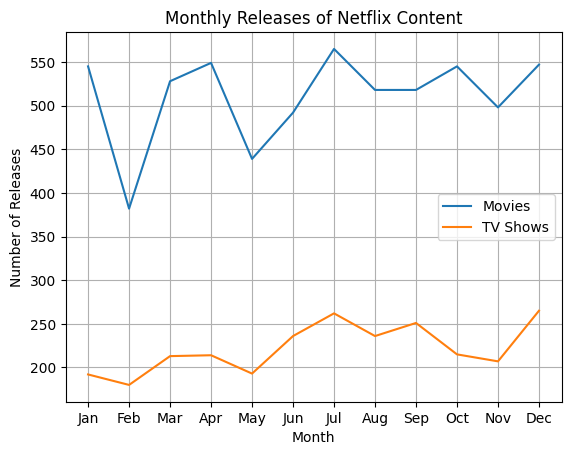

In [15]:
# 4. Monthly Content Release
monthly_movie = data[data['type'] == 'Movie']['month'].value_counts().sort_index()
monthly_show = data[data['type'] == 'TV Show']['month'].value_counts().sort_index()
plt.plot(monthly_movie.index, monthly_movie.values, label='Movies')
plt.plot(monthly_show.index, monthly_show.values, label='TV Shows')
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Monthly Releases of Netflix Content")
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.grid(True)
plt.show()

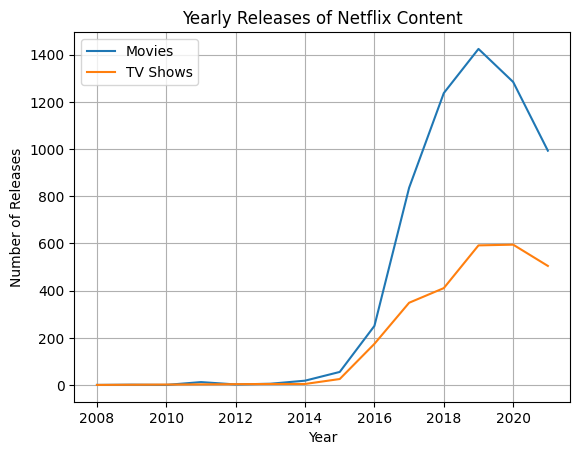

In [18]:
# 5. Yearly Content Release
yearly_movie = data[data['type'] == 'Movie']['year'].value_counts().sort_index()
yearly_show = data[data['type'] == 'TV Show']['year'].value_counts().sort_index()
plt.plot(yearly_movie.index, yearly_movie.values, label='Movies')
plt.plot(yearly_show.index, yearly_show.values, label='TV Shows')
plt.title("Yearly Releases of Netflix Content")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.grid(True)
plt.legend()
plt.show()

/var/folders/v0/87_rm9fx26qgc2ffgmn71pqc0000gn/T/ipykernel_4032/904099165.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


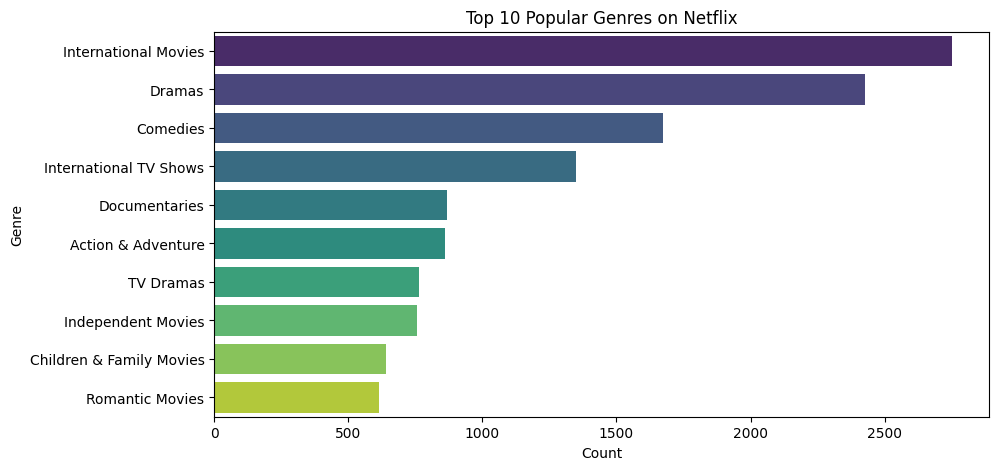

In [24]:
# 6. Top 10 Genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
flat_genres = pd.Series([g.strip() for sublist in data['genres'] for g in sublist])
top_genres = flat_genres.value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title("Top 10 Popular Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

/var/folders/v0/87_rm9fx26qgc2ffgmn71pqc0000gn/T/ipykernel_4032/2356918295.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')


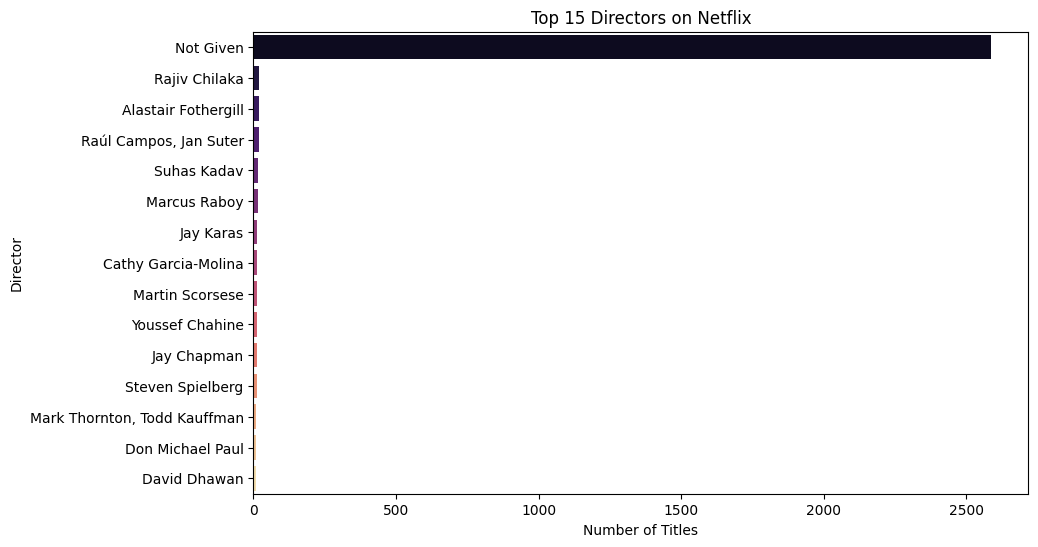

In [26]:
# 7. Top Directors
top_directors = data['director'].value_counts().head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title("Top 15 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()



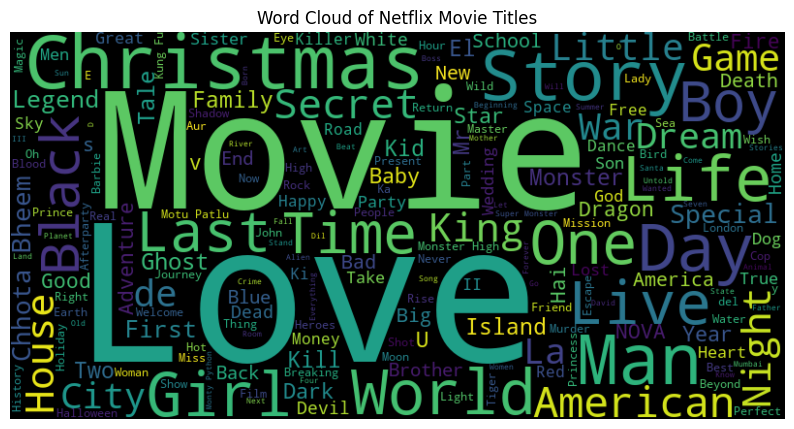

In [29]:
# 8. Word Cloud of Movie Titles
movie_titles = ' '.join(data[data['type'] == 'Movie']['title'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(movie_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Netflix Movie Titles")
plt.show()

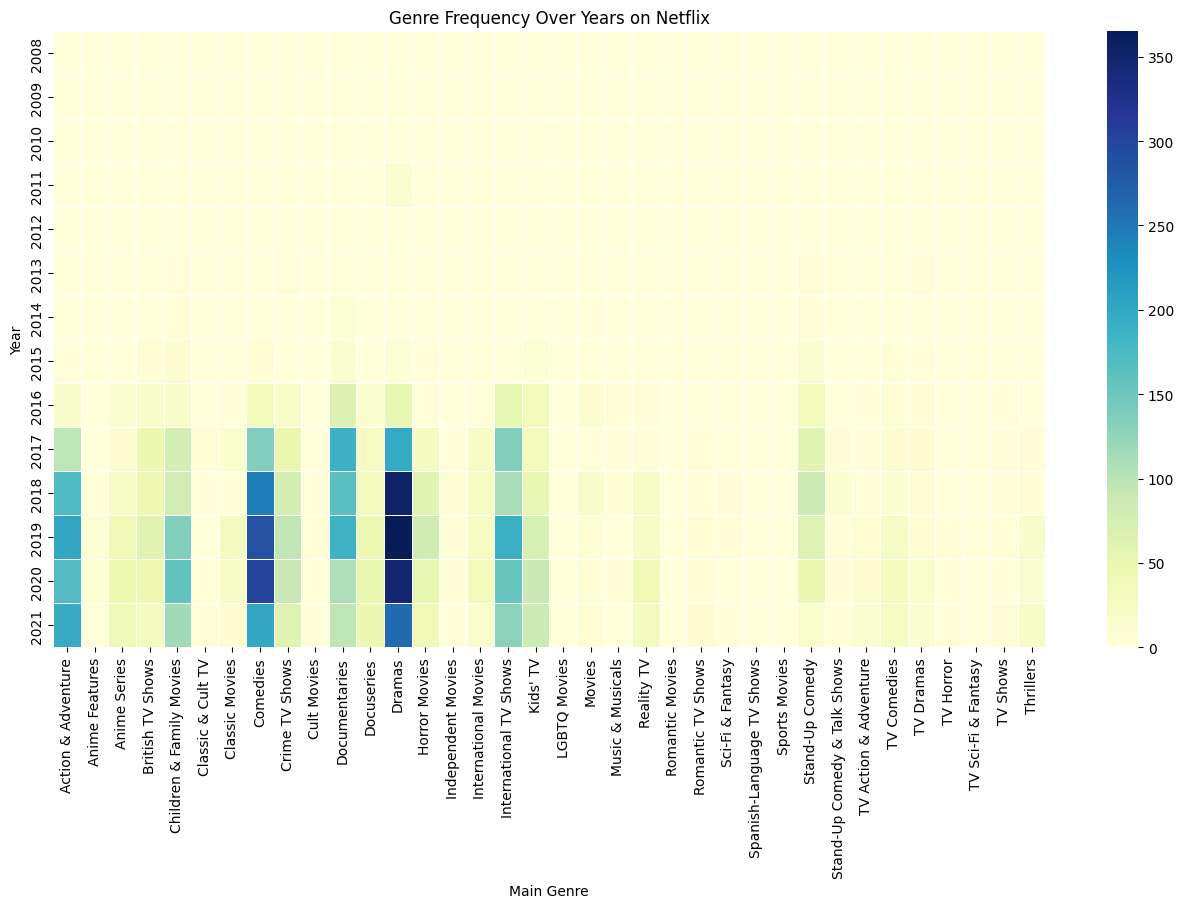

In [31]:
# Extract primary genre
data['main_genre'] = data['listed_in'].apply(lambda x: x.split(',')[0])

# Pivot table: genre vs year
genre_year = pd.crosstab(data['year'], data['main_genre'])

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(genre_year, cmap='YlGnBu', linewidths=.5)
plt.title("Genre Frequency Over Years on Netflix")
plt.ylabel("Year")
plt.xlabel("Main Genre")
plt.show()


/var/folders/v0/87_rm9fx26qgc2ffgmn71pqc0000gn/T/ipykernel_4032/193994136.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


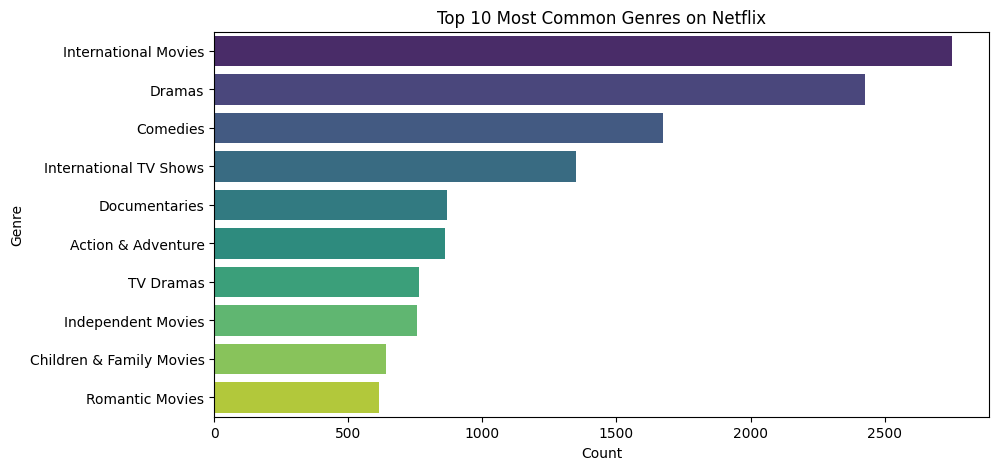

In [34]:
# Split genres and explode for analysis
data['genres'] = data['listed_in'].str.split(', ')
genre_counts = data.explode('genres')['genres'].value_counts().head(10)

# Plot top genres
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


In [40]:
if 'cast' in data.columns:
    from collections import Counter

    data['cast'] = data['cast'].fillna('')
    actor_list = [actor.strip() for cast in data['cast'] for actor in cast.split(',')]
    top_actors = Counter(actor_list).most_common(10)

    actor_df = pd.DataFrame(top_actors, columns=['Actor', 'Count'])
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Count', y='Actor', data=actor_df, palette='magma')
    plt.title('Top 10 Most Frequent Actors')
    plt.show()
else:
    print("No 'cast' column found in the dataset.")


No 'cast' column found in the dataset.


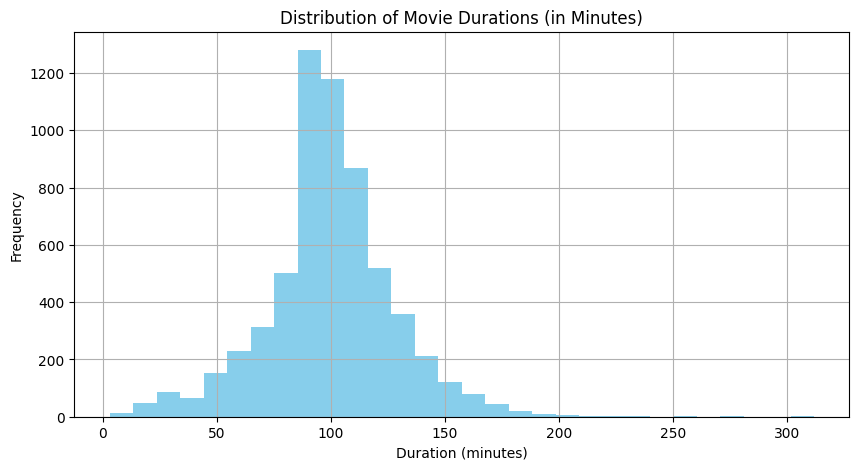

In [42]:
# Extract duration in minutes
data['duration_mins'] = data['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else None)

# Plot histogram
plt.figure(figsize=(10, 5))
data['duration_mins'].dropna().hist(bins=30, color='skyblue')
plt.title('Distribution of Movie Durations (in Minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



## 📌 Conclusion

This project provided a comprehensive analysis of Netflix’s content library, applying data cleaning, feature engineering, visual exploration, and even content-based recommendation techniques.

### 🔍 Key Insights:
- **Content Composition**: Movies make up the majority of Netflix's catalog, with TV Shows forming a strong secondary share.
- **Genre Distribution**: Dramas, comedies, and documentaries dominate viewer offerings, reflecting mainstream preferences.
- **Ratings Breakdown**: A significant portion of content is tailored for mature audiences, highlighting Netflix’s target demographic.
- **Global Footprint**: The United States, India, and the UK are the most represented countries in the dataset.
- **Temporal Trends**: Content additions surged during the 2018–2020 period, aligning with Netflix's global expansion and pandemic-driven demand.
- **Duration Patterns**: Movie durations generally range between 60–120 minutes, with notable outliers analyzed.
- **Actor Frequencies**: A handful of actors appear repeatedly across Netflix titles, indicating prolific careers or partnerships.
- **Genre Trends**: Genre popularity has evolved over time, with the ability to track shifts across years and countries.

### 🤖 Recommendation System:
A content-based filtering model was implemented using genre and director similarity. This model successfully suggests similar titles to any input movie based on text similarity using TF-IDF and cosine distance—demonstrating the potential for scalable personalization.

### 🚀 Final Thoughts:
This project not only demonstrates strong data analysis and visualization skills, but also showcases applied machine learning and recommendation techniques. It sets a strong foundation for building dashboards, automating recommendations, or integrating additional user behavior data for deeper personalization.
